# Clusterização - Classificação Não Supervisionada

In [1]:
import pandas as pd, numpy as np
import sklearn.cluster, sklearn.preprocessing
import matplotlib, matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:,.0f}'.format

In [2]:
# Lendo o dataset mosn - Most Online Social Network
df = pd.read_csv('mosn.csv', thousands=',',
                   names=('Name', 'Description', 'Date', 'Registered Users',
                          'Registration', 'Alexa Rank'))
columns = ['Registered Users', 'Alexa Rank']
df.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914"
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447"
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620"
4,aNobii,Books,2006,nan,Open,"26,939"


In [3]:
len(df)

209

In [4]:
df.tail()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
204,Yammer,Social networking for office colleagues,2008,nan,Must have company email,"3,622"
205,"Yelp, Inc.",Local business review and talk,NaN,nan,Open,186
206,Yookos,"General: photos, videos, blogs, games.",NaN,nan,Open,"53,498"
207,Zoo.gr,Greek web meeting point,2004,"890,000",Open,"34,577"
208,Zooppa,Online community for creative talent (host of ...,NaN,"60,000",Open to people 14 and older,"36,373"


# Análise Descritiva

count             138
mean       53,670,308
std       190,459,963
min             1,300
25%           422,500
50%         3,000,000
75%        23,142,747
max     1,600,000,000
Name: Registered Users, dtype: float64


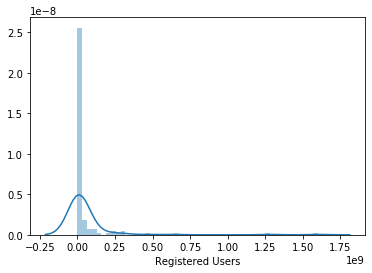

In [5]:
import seaborn as sns
import numpy as np
df2 = df.copy()
df2 = df2.dropna(subset=['Registered Users'])
sns.distplot(df2['Registered Users'])
print(df2['Registered Users'].describe())

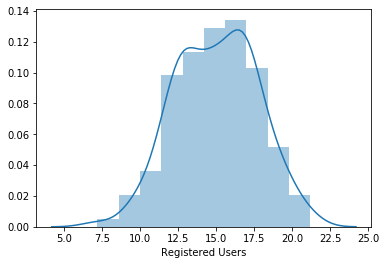

In [6]:
sns.distplot(np.log(df2['Registered Users']))

count         135
mean       80,198
std       190,750
min             2
25%         1,330
50%         8,011
75%        42,676
max     1,115,305
Name: Alexa Rank, dtype: float64


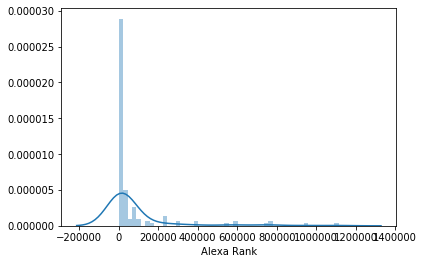

In [7]:
df2 = df2.dropna(subset=['Alexa Rank'])
sns.distplot(df2['Alexa Rank'])
print(df2['Alexa Rank'].describe())

# Algumas redes socias...

In [10]:
# procurar Redes Sociais Específicas

df[df['Registered Users'] == df['Registered Users'].max() ]

,Name,Description,Date,Registered Users,Registration,Alexa Rank
77,Google+,General,28 June 2011,"1,600,000,000",Open to people 13 and older,nan


In [ ]:
df[df.Name == "Facebook"]

In [9]:
# procurar Redes Sociais Específicas
df[df['Name'].isin(["Twitter", "Facebook", "Instagram"])]

,Name,Description,Date,Registered Users,Registration,Alexa Rank
49,Facebook,"General: photos, videos, blogs, apps.",February 2004,"1,280,000,000",Open to people 13 and older,2
90,Instagram,A photo and video sharing site.,October 2010,"300,000,000",Open to anyone 13 or older,41
182,Twitter,"General. Micro-blogging, RSS, updates",15 July 2006,"645,750,000",Open to all ages,8


# Pré-processamento

In [11]:
# Elimina linhas com dados "missing" (faltosos-Nulos) e zeros
df2 = df[np.log(df[columns]).notnull().all(axis=1)].copy()
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914"
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447"
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620"
6,aSmallWorld,European jet set and social elite world-wide,March 2004,"550,000",Invite-only,"580,060"


In [12]:
len(df2)

135

# Clusterização

In [13]:
columns

['Registered Users', 'Alexa Rank']

In [14]:
df2.loc[:, columns].head()

,Registered Users,Alexa Rank
0,"3,000,000","12,914"
1,"18,000,000",824
2,"5,000,000","1,447"
3,"13,575","292,620"
6,"550,000","580,060"


In [15]:
# aplicar o algoritmo de clusterização
from sklearn.cluster import KMeans
kmeans = KMeans()
kmeans.fit(np.log(df2[columns]))
df2["Clusters"] = kmeans.labels_
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914",3
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824,6
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447",7
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620",0
6,aSmallWorld,European jet set and social elite world-wide,March 2004,"550,000",Invite-only,"580,060",4


In [17]:
# acessando a tupla que contém o Facebook
fb = df2.set_index('Name').ix['Facebook']['Clusters']
df2.iloc[fb,:]

Name                              About.me
Description         Social networking site
Date                          October 2009
Registered Users                 5,000,000
Registration                          Open
Alexa Rank                           1,447
Clusters                                 7
Name: 2, dtype: object

In [19]:
df2[df2.Name == "Facebook"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
49,Facebook,"General: photos, videos, blogs, apps.",February 2004,"1,280,000,000",Open to people 13 and older,2,2


In [20]:
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914",3
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824,6
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447",7
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620",0
6,aSmallWorld,European jet set and social elite world-wide,March 2004,"550,000",Invite-only,"580,060",4


In [21]:
df2.Clusters.value_counts()

5    27
1    25
6    23
7    16
3    15
0    13
4     8
2     8
Name: Clusters, dtype: int64

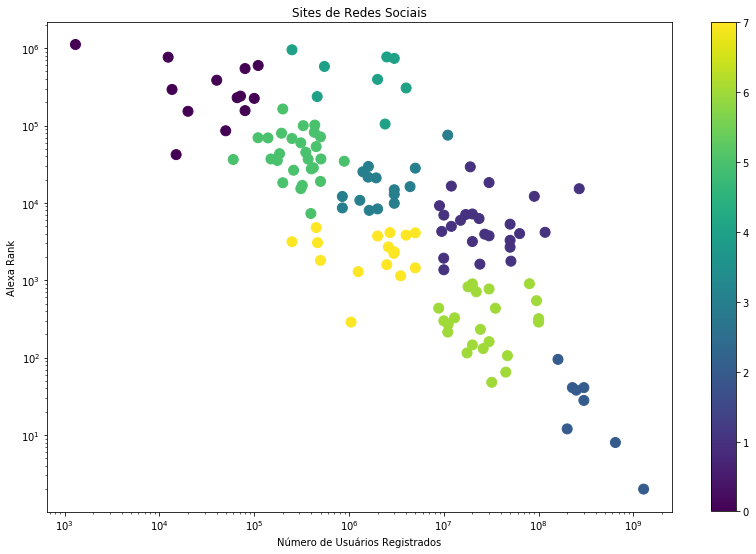

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
colors=['#12efff','#eee111','#eee00f','#e00fff','#123456','#abc222','#000000','#123fff','#1eff1f','#2edf4f','#2eaf9f',
        '#22222f',
        '#eeeff1','#eee112','#00ef00','#aa0000','#0000aa','#000999','#32efff','#23ef68','#2e3f56','#7eef1f','#eeef11']

C=1

x = df2['Registered Users'] 
y = df2['Alexa Rank']
Cluster = df2["Clusters"]    # Labels of cluster 0 to 3

dim_plot = (14,9)
fig = plt.figure(figsize=dim_plot)
ax = fig.add_subplot(111)
scatter = ax.scatter(x,y,c=Cluster,s=100)

ax.set_xlabel('Número de Usuários Registrados')
ax.set_ylabel('Alexa Rank')
plt.colorbar(scatter)
plt.title("Sites de Redes Sociais")
plt.xscale("log")
plt.yscale("log")
ax.set_aspect('auto')
#plt.figure(figsize=(18,12))
#plt.subplots(figsize=(12, 10))

#fig.show()
plt.show()

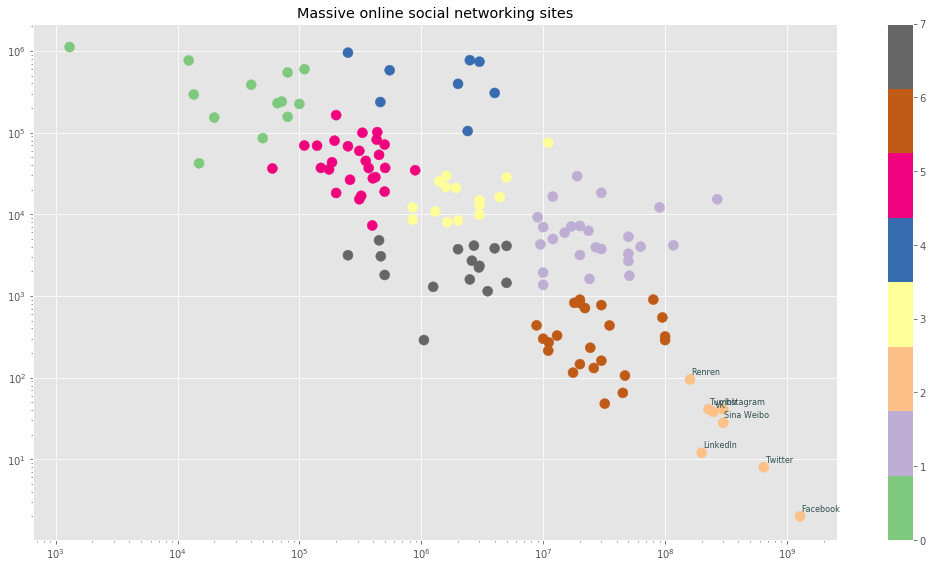

In [23]:
# Select a good-locking style
matplotlib.style.use("ggplot")

dim_plot = (18,9.5)
fig = plt.figure(figsize=dim_plot)
ax = fig.add_subplot(111)

x = df2['Registered Users'] 
y = df2['Alexa Rank']
Cluster = df2["Clusters"]
# Display the results
scatter = ax.scatter(x,y,c=Cluster,  cmap=plt.cm.Accent,s=100)

#scatter = df2.plot.scatter(columns[0], columns[1], c="Clusters", 
#                       cmap=plt.cm.Accent, s=100)

plt.colorbar(scatter)
plt.title("Massive online social networking sites")
plt.xscale("log")
plt.yscale("log")
ax.set_aspect('auto')


# Annotate the most prominent sites
def add_abbr(site):
    if site['Clusters'] == fb:
        _ = ax.annotate(site["Name"], site[columns], xytext=(1, 5), 
                        textcoords="offset points", size=8,
                        color="darkslategrey")
df2.apply(add_abbr, axis=1)
#ax.set_aspect('auto')
#ax.set_aspect(.5)
plt.show()

In [24]:
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914",3
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824,6
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447",7
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620",0
6,aSmallWorld,European jet set and social elite world-wide,March 2004,"550,000",Invite-only,"580,060",4


In [25]:
# Cluster do Facebook
df2[df2.Name == "Facebook"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
49,Facebook,"General: photos, videos, blogs, apps.",February 2004,"1,280,000,000",Open to people 13 and older,2,2


In [26]:
# Cluster do Twitter
df2[df2.Name == "Twitter"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
182,Twitter,"General. Micro-blogging, RSS, updates",15 July 2006,"645,750,000",Open to all ages,8,2


In [27]:
# Cluster do Academia.edu 
df2[df2.Name == "Academia.edu"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824,6


In [38]:
df2[df2.Name == "Instagram"]

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
90,Instagram,A photo and video sharing site.,October 2010,"300,000,000",Open to anyone 13 or older,41,2


# Predição de novos dados

In [39]:
df2.head()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
0,43 Things,Goal setting and achievement,1 January 2005,"3,000,000",Closed,"12,914",3
1,Academia.edu,Social networking site for academics/researchers,September 2008,"18,000,000",Open,824,6
2,About.me,Social networking site,October 2009,"5,000,000",Open,"1,447",7
3,Advogato,Free and open source software developers,1999,"13,575",Open,"292,620",0
6,aSmallWorld,European jet set and social elite world-wide,March 2004,"550,000",Invite-only,"580,060",4


In [40]:
df2.tail()

,Name,Description,Date,Registered Users,Registration,Alexa Rank,Clusters
200,WriteAPrisoner.com,"Site networking inmates, friends, family",September 2000,"66,000",Open to people 18 years and older,"228,915",0
201,Xanga,"Blogs and ""metro"" areas",1998,"27,000,000",Open,"3,943",1
202,XING,"Business (primarily Europe (Germany, Austria, ...",NaN,"11,100,000",Open,270,6
207,Zoo.gr,Greek web meeting point,2004,"890,000",Open,"34,577",5
208,Zooppa,Online community for creative talent (host of ...,NaN,"60,000",Open to people 14 and older,"36,373",5


In [41]:
import numpy as np

columns = ['Registered Users', 'Alexa Rank']
dados_x = [[1800000, 842], [5000000, 1200], [60000, 35000] ]
filmes = np.log([[1800000, 842], [5000000, 1200], [60000, 35000]])
kmeans.predict(filmes)

array([7, 7, 5], dtype=int32)

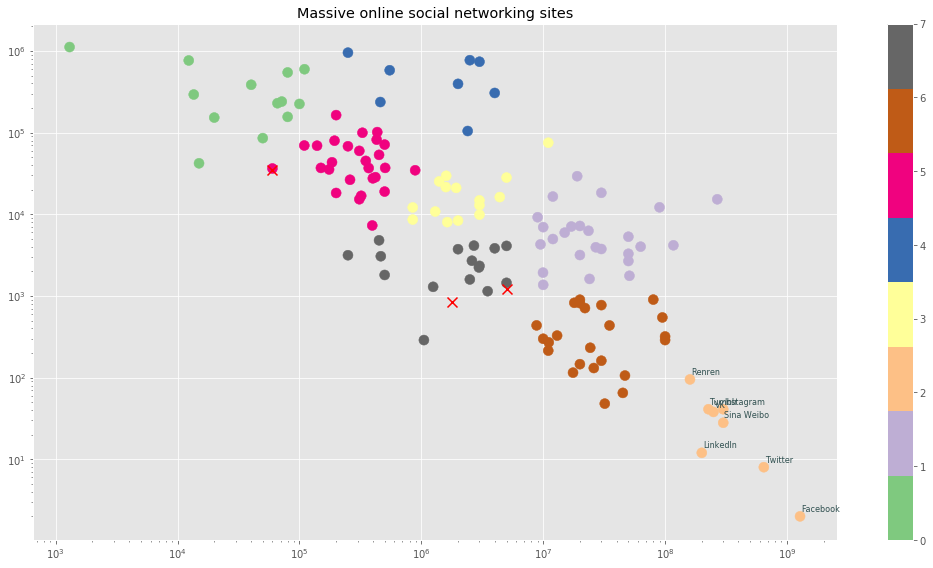

In [42]:
# Select a good-locking style
matplotlib.style.use("ggplot")

dim_plot = (18,9.5)
fig = plt.figure(figsize=dim_plot)
ax = fig.add_subplot(111)

x = df2['Registered Users'] 
y = df2['Alexa Rank']
Cluster = df2["Clusters"]
# Display the results
scatter = ax.scatter(x,y,c=Cluster,  cmap=plt.cm.Accent,s=100)

#scatter = df2.plot.scatter(columns[0], columns[1], c="Clusters", 
#                       cmap=plt.cm.Accent, s=100)

plt.colorbar(scatter)
plt.title("Massive online social networking sites")
plt.xscale("log")
plt.yscale("log")
ax.set_aspect('auto')


# Annotate the most prominent sites
def add_abbr(site):
    if site['Clusters'] == fb:
        _ = ax.annotate(site["Name"], site[columns], xytext=(1, 5), 
                        textcoords="offset points", size=8,
                        color="darkslategrey")
df2.apply(add_abbr, axis=1)
#ax.set_aspect('auto')
#ax.set_aspect(.5)

# os novos dados
dados_x = [[1800000, 842], [5000000, 1200], [60000, 35000] ]
x_new = [x[0] for x in dados_x]
y_new = [y[1] for y in dados_x]
plt.scatter(x_new,y_new, c='red', marker='x', s=100)

plt.show()

#  Determinando o melhor número de Clusters (Elbow Method)

In [44]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

Xy = df2.loc[:, ['Registered Users', 'Alexa Rank']]

Ks = range(1, 10)
km = [KMeans(n_clusters=i) for i in Ks]
score = [km[i].fit(Xy).score(Xy) for i in range(len(km))]
formatted_score = map(lambda x : '{:,.0f}'.format(x), score)
print(list(formatted_score))

['-2,367,150,933,656,049,152', '-635,896,091,657,381,120', '-225,315,240,511,212,224', '-83,721,721,662,697,344', '-32,748,926,094,538,408', '-18,033,409,285,934,752', '-10,664,236,523,111,170', '-6,912,139,416,913,370', '-4,409,574,476,032,265']


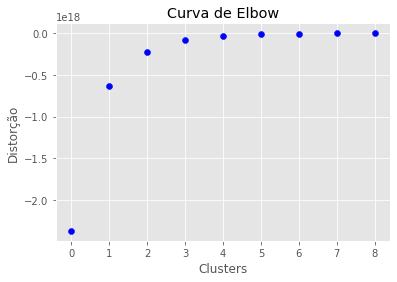

In [45]:
plt.scatter( list(range(len(score))), score, c="b")
plt.title("Curva de Elbow")
plt.xlabel("Clusters")
plt.ylabel("Distorção")
plt.show()